In [1]:
import pandas as pd
ageinc_df = pd.read_csv('ageinc.csv')

In [2]:
ageinc_df['z_income'] = (ageinc_df['income'] - ageinc_df['income'].mean())/ageinc_df['income'].std()
ageinc_df['z_age'] = (ageinc_df['age'] - ageinc_df['age'].mean())/ageinc_df['age'].std()

In [3]:
from sklearn import cluster

model = cluster.KMeans(n_clusters=2, random_state=10)
X = ageinc_df[['z_income','z_age']].as_matrix()
cluster_assignments = model.fit_predict(X)
centers = model.cluster_centers_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [4]:
import numpy as np

print(np.sum((X - centers[cluster_assignments]) ** 2))

1189.7476232504307


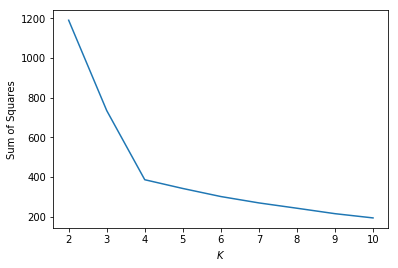

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

ss = []
krange = list(range(2,11))
X = ageinc_df[['z_income','z_age']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[cluster_assignments]) ** 2))
    
plt.plot(krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()